In [26]:
from datetime import date, datetime
from functools import partial
from aerofiles.igc import Reader
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [35]:
def read_igc(filename):
    igc_reader = Reader()

    with open(filename, "r") as f:
        return igc_reader.read(f)


def normalise_datetime(df, igc_date):
    igc["header"]
    to_datetime = partial(datetime.combine, igc_date)
    df["time"] = df["time"].apply(to_datetime)
    df.set_index("time", inplace=True)
    return df


def analyse_igc(igc_data, data_rate=1):
    df = pd.DataFrame(igc_data["fix_records"][1])
    df = df.drop(["validity"], axis=1)
    df = normalise_datetime(df, igc_data["header"][1]["utc_date"])
    # df = resample(df)
    df["TAS"] = df["TAS"] / 100  # km/h

    df["rlat"] = np.radians(df["lat"])
    df["rlon"] = np.radians(df["lon"])
    shifted = df.shift(1)
    df["a"] = np.sin((df["rlat"] - shifted["rlat"])/2)**2 + np.cos(df["rlat"]) * np.cos(shifted["rlat"]) * np.sin((df["rlon"] - shifted["rlon"])/2)**2

    df["vGPS"] = 2 * 6371 * np.arcsin(np.sqrt(df["a"]))
    df["vGPS"] *= 1000 * 3.6
    df["vGPS"] /= data_rate
    df["diff"] = df["TAS"] - df["vGPS"]

    df["vs"] = df["pressure_alt"].diff()
    df["vs_smooth"] = df["vs"].rolling(5).mean()

    return df

In [28]:
igc = read_igc(
    r"C:\Users\Oisin\Akaflieg Berlin e.V\Akaflieg Berlin - Documents\B13 Sommertreffen\Überziehen\IGC Logs\2020-08-20 Überzeihversuche.igc")

In [77]:
def plot_diff(start, end, df, titel, markers=None):
    df = df.copy(deep=True)
    df = df[(df.index >= start) & (df.index <= end)]

    mean_diff = float(data[data.index <= datetime(year=2020, month=8, day=24, hour=10, minute=48, second=30)][["diff"]].mean())
    df["diff_mean"] = df["diff"] - mean_diff
    
    fig, axes = plt.subplots(nrows=2, ncols=1)
    fig.set_figwidth(7)
    fig.set_figheight(5)

    # data = data.rename(columns={"diff_mean": "Differenz"})
    df[["TAS", "vGPS"]].plot(ax=axes[0])
    df[["diff"]].plot(ax=axes[1], color="green")

    axes[0].set_title(titel)

    axes[0].set_xticks([], minor=True)
    axes[0].set_xticklabels([])
    axes[0].set_xlabel("")
    axes[0].set_ylabel("v in km/h")
    axes[0].grid(True, "both", "both")
    
    if markers:
        for marker in markers:
            axes[0].axvline(x=marker, color="red", linewidth=0.5)
            axes[1].axvline(x=marker, color="red", linewidth=0.5)
    axes[1].set_ylabel("v in km/h")
    axes[1].set_xlabel("Zeit")
    axes[1].grid(True, "both", "both")


    plt.show()

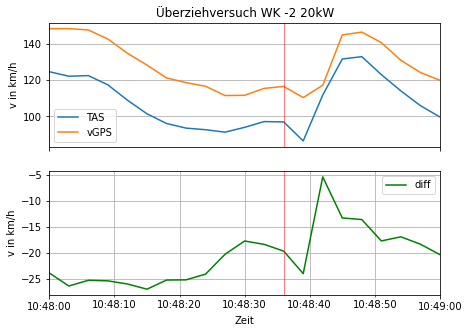

In [46]:
data = analyse_igc(igc, data_rate=3)
plot_diff(datetime(year=2020, month=8, day=20, hour=10, minute=48, second=0), 
          datetime(year=2020, month=8, day=20, hour=10, minute=49, second=0), data, "Überziehversuch WK -2 20kW",
         [datetime(year=2020, month=8, day=20, hour=10, minute=48, second=36)])

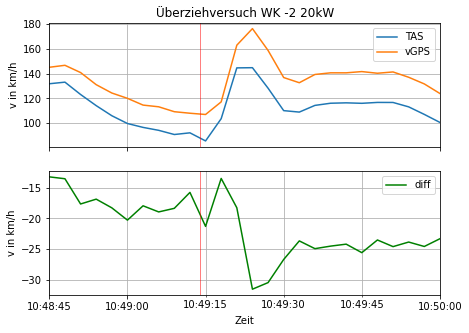

In [31]:
plot_diff(datetime(year=2020, month=8, day=20, hour=10, minute=48, second=45), 
          datetime(year=2020, month=8, day=20, hour=10, minute=50, second=0), data, "Überziehversuch WK -2 20kW",
         [datetime(year=2020, month=8, day=20, hour=10, minute=49, second=14)])

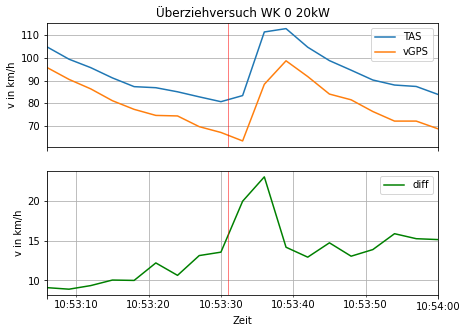

In [32]:
plot_diff(datetime(year=2020, month=8, day=20, hour=10, minute=53, second=5), 
          datetime(year=2020, month=8, day=20, hour=10, minute=54, second=0), data, "Überziehversuch WK 0 20kW",
         [datetime(year=2020, month=8, day=20, hour=10, minute=53, second=31)])

## Überziehversuche 24.08.2020 bei hinterster Schwerpunktlage

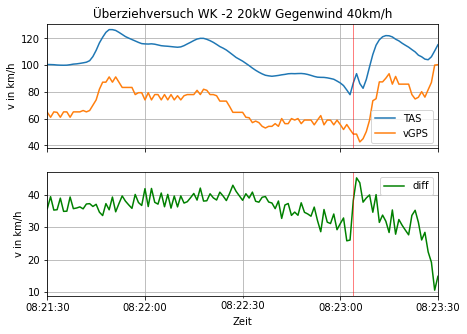

In [78]:
igc2 = read_igc(r"C:\Users\Oisin\Akaflieg Berlin e.V\Akaflieg Berlin - Documents\B13 Sommertreffen\Überziehen\IGC Logs\2020-08-24 Überziehen hinten.igc")

data = analyse_igc(igc2)
plot_diff(datetime(year=2020, month=8, day=24, hour=8, minute=21, second=30), 
          datetime(year=2020, month=8, day=24, hour=8, minute=23, second=30), data, "Überziehversuch WK -2 20kW Gegenwind 40km/h",
         [datetime(year=2020, month=8, day=24, hour=8, minute=23, second=4)])

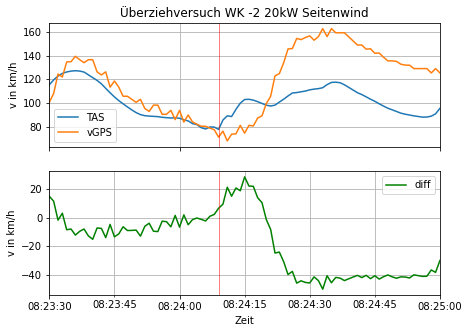

In [56]:
plot_diff(datetime(year=2020, month=8, day=24, hour=8, minute=23, second=30), 
          datetime(year=2020, month=8, day=24, hour=8, minute=25, second=0), data, "Überziehversuch WK -2 20kW Seitenwind",
         [datetime(year=2020, month=8, day=24, hour=8, minute=24, second=9)])

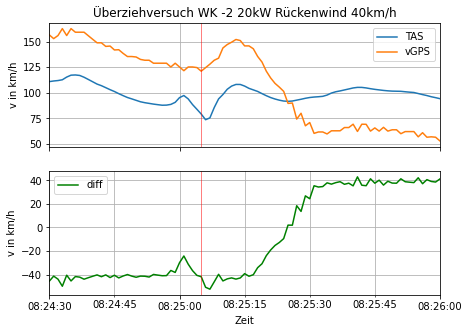

In [57]:
plot_diff(datetime(year=2020, month=8, day=24, hour=8, minute=24, second=30), 
          datetime(year=2020, month=8, day=24, hour=8, minute=26, second=0), data, "Überziehversuch WK -2 20kW Rückenwind 40km/h",
         [datetime(year=2020, month=8, day=24, hour=8, minute=25, second=5)])

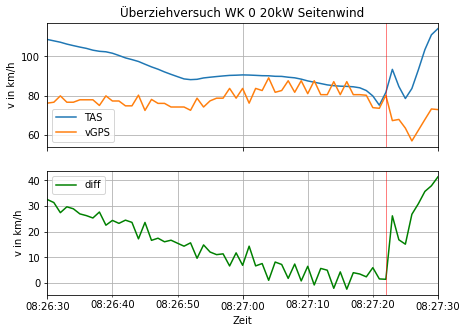

In [58]:
plot_diff(datetime(year=2020, month=8, day=24, hour=8, minute=26, second=30), 
          datetime(year=2020, month=8, day=24, hour=8, minute=27, second=30), data, "Überziehversuch WK 0 20kW Seitenwind",
         [datetime(year=2020, month=8, day=24, hour=8, minute=27, second=22)])

* Keine Kursänderung oder Schiebewinkel
* 

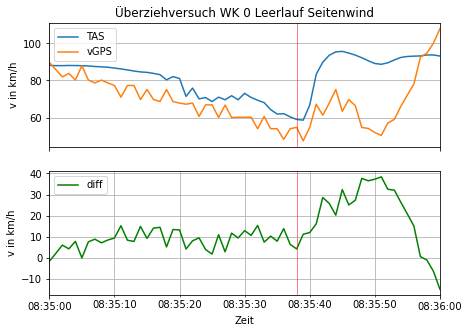

In [59]:
plot_diff(datetime(year=2020, month=8, day=24, hour=8, minute=35, second=0), 
          datetime(year=2020, month=8, day=24, hour=8, minute=36, second=0), data, "Überziehversuch WK 0 Leerlauf Seitenwind",
         [datetime(year=2020, month=8, day=24, hour=8, minute=35, second=38)])

* Kursänderung von ca. 60°
* 

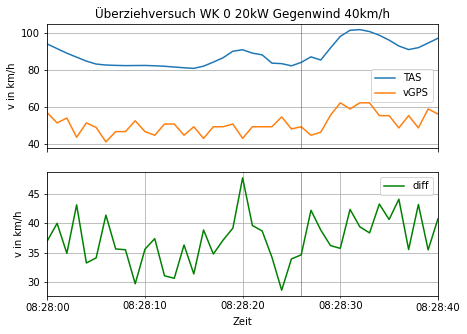

In [64]:
plot_diff(datetime(year=2020, month=8, day=24, hour=8, minute=28, second=0), 
          datetime(year=2020, month=8, day=24, hour=8, minute=28, second=40), data, "Überziehversuch WK 0 20kW Gegenwind 40km/h",
         [datetime(year=2020, month=8, day=24, hour=8, minute=28, second=26)])

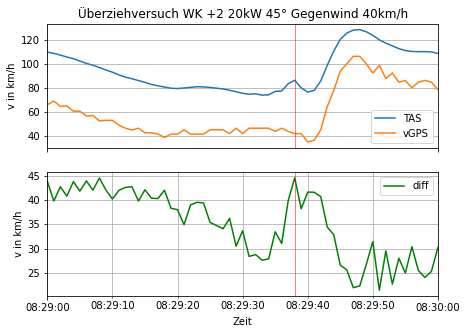

In [67]:
plot_diff(datetime(year=2020, month=8, day=24, hour=8, minute=29, second=0), 
          datetime(year=2020, month=8, day=24, hour=8, minute=30, second=0), data, "Überziehversuch WK +2 20kW 45° Gegenwind 40km/h",
         [datetime(year=2020, month=8, day=24, hour=8, minute=29, second=38)])

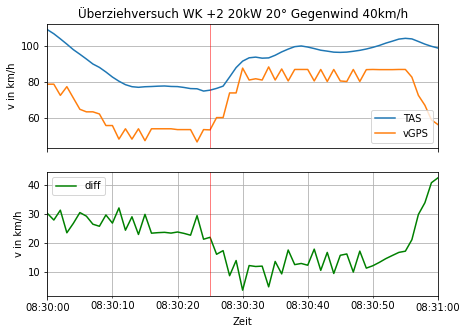

In [69]:
plot_diff(datetime(year=2020, month=8, day=24, hour=8, minute=30, second=0), 
          datetime(year=2020, month=8, day=24, hour=8, minute=31, second=0), data, "Überziehversuch WK +2 20kW 20° Gegenwind 40km/h",
         [datetime(year=2020, month=8, day=24, hour=8, minute=30, second=25)])